In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
import datetime

In [59]:
df = {}
for i,file in enumerate(glob.glob('usa*.csv')):
    test = pd.read_csv(file)
    df['df'+str(i)] = test[test['State'].isin(test['State'].value_counts().index[:15])]

In [62]:
test = df['df10']

In [63]:
test['State'].value_counts()

California        10529
Texas              9203
New York           7526
Washington         3358
Illinois           2886
Florida            2825
Georgia            2354
Pennsylvania       2166
New Jersey         2059
Ohio               1927
Massachusetts      1763
Louisiana          1685
Michigan           1672
Maryland           1667
North Carolina     1587
Name: State, dtype: int64

In [64]:
senti = {}
for i,dataframe in df.items():
    senti['senti'+str(i)] = dataframe.groupby(['State'])['sentiment'].mean().sort_values(ascending=False)
    

In [65]:
senti_full = pd.DataFrame([f for _,f in senti.items()])
dates = pd.date_range('2020-03-19',periods=len(senti_full)).tolist()
senti_full.index= map(lambda x : str(x.date()),dates)

In [66]:
senti_full = senti_full.dropna(axis=1)

In [67]:
senti_full

,Washington,Ohio,Massachusetts,New York,Pennsylvania,Michigan,California,Illinois,North Carolina,Florida,Texas,Georgia,Maryland
2020-03-19,0.021447,0.021139,0.019978,0.014708,0.009631,0.000323,-0.002162,-0.003422,-0.008071,-0.014798,-0.016572,-0.018249,-0.031054
2020-03-20,0.020499,-0.005717,0.012120,0.018409,-0.010302,-0.012408,-0.003867,-0.010216,-0.027673,-0.007483,-0.024843,-0.035454,-0.035907
2020-03-21,0.041626,0.013204,0.030368,0.022307,0.027944,0.029173,0.016694,0.006132,0.010102,0.010968,0.011464,0.000857,0.009751
2020-03-22,0.023280,0.011446,0.013208,0.014342,0.004882,0.003203,-0.032298,-0.025521,-0.027911,-0.035390,-0.046690,-0.034075,-0.028508
2020-03-23,0.048745,0.016986,0.040064,0.028283,0.045050,0.018161,0.014400,0.017205,0.010639,0.005390,0.003096,0.001701,0.013113
2020-03-24,0.010177,0.003013,0.013918,0.013827,0.009376,0.005732,-0.009087,-0.000709,-0.001177,-0.013480,-0.003091,-0.006243,-0.005936
2020-03-25,0.026721,0.008052,0.016267,0.024736,0.026114,0.009387,-0.006206,0.012811,0.013634,-0.006214,-0.003449,0.017506,0.013971
2020-03-26,0.030681,0.006557,0.020754,0.029168,0.009565,-0.005412,0.016341,0.017918,-0.007773,-0.025459,-0.005442,0.005332,0.006223
2020-03-27,0.050162,0.008987,0.043192,0.044236,0.027685,0.011802,0.035991,0.033808,0.024646,0.017928,0.015868,0.020527,0.032268
2020-03-28,0.062253,0.040260,0.063914,0.047081,0.041452,0.021565,0.057064,0.050760,0.039179,0.026468,0.043947,0.047999,0.028088


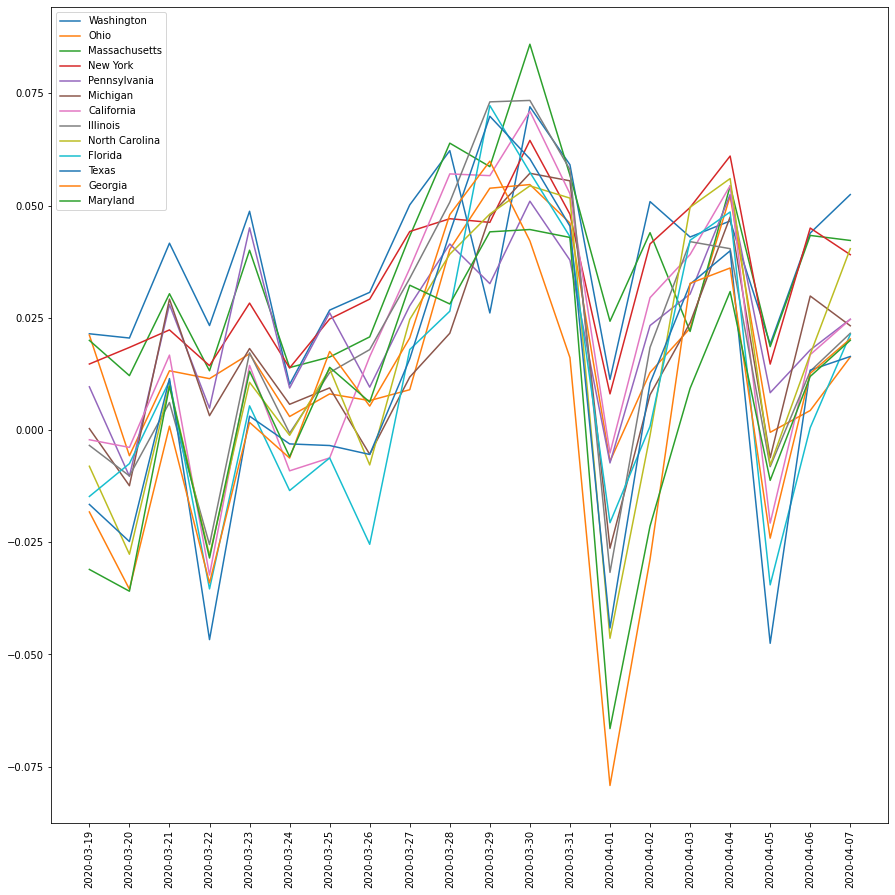

In [69]:
plt.rcParams['figure.figsize']=(15,15)
for i, column in enumerate(senti_full.columns):
    plt.plot(senti_full.index,senti_full[column],label=column)
plt.xticks(rotation=90)    
plt.legend()